# Voronoi Graphs

In [1]:
# Make the relevant imports including Voronoi methods
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
plt.rcParams["figure.figsize"] = [12, 12]

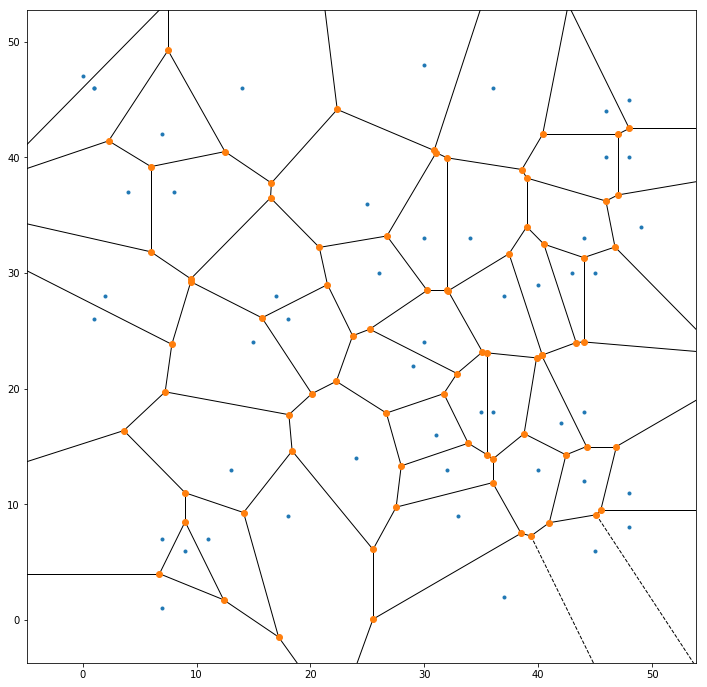

In [3]:

# Recreate the figure above for a new set of random points
points = np.random.randint(50, size=(50, 2))
graph = Voronoi(points)
voronoi_plot_2d(graph)
plt.show()

In [4]:
# Read in the obstacle data
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)

In [5]:
data.shape

(3845, 6)

In [11]:
# If you want to use the prebuilt bresenham method
# Import the Bresenham package
from bresenham import bresenham
def bres(p1, p2):
    """
    Note this solution requires `x1` < `x2` and `y1` < `y2`.
    """
    x1, y1 = p1
    x2, y2 = p2
    cells = []
    
    # Here's a quick explanation in math terms of our approach
    # First, set dx = x2 - x1 and dy = y2 - y1
    dx, dy = x2 - x1, y2 - y1
    # Then define a new quantity: d = x dy - y dx.
    # and set d = 0 initially
    d = 0
    # The condition we care about is whether 
    # (x + 1) * m < y + 1 or moving things around a bit: 
    # (x + 1) dy / dx < y + 1 
    # which implies: x dy - y dx < dx - dy
    # or in other words: d < dx - dy is our new condition
    
    # Initialize i, j indices
    i = x1
    j = y1
    
    while i < x2 and j < y2:
        cells.append([i, j])
        if d < dx - dy:
            d += dy
            i += 1
        elif d == dx - dy:
            # uncomment these two lines for conservative approach
            cells.append([i+1, j])
            cells.append([i, j+1])
            d += dy
            i += 1  
            d -= dx
            j += 1
        else:
            d -= dx
            j += 1

    return np.array(cells)

In [36]:
??bresenham

In [43]:
for v_index in graph.ridge_vertices:
    v_node1 = graph.vertices[v_index[0]]
    v_node2 = graph.vertices[v_index[1]]
#     v_node1_int = v_node1.round()
    v_node1_int = v_node1.astype(int)
    v_node2_int = v_node2.round().astype(int)

    print(v_node1, v_node1_int)
#     break
#     print(v_node1_int, v_node2_int)
#     cells = bresenham(*v_node1_int, *v_node2_int)
#     print(list(cells))
#     break

[ 7.5  49.25] [ 7 49]
[ 7.5  49.25] [ 7 49]
[12.5 40.5] [12 40]
[ 2.28571429 41.42857143] [ 2 41]
[ 7.5 53.5] [ 7 53]
[ 7.5 53.5] [ 7 53]
[-8. 38.] [-8 38]
[40.31481481 22.87037037] [40 22]
[40.31481481 22.87037037] [40 22]
[347.5   9.5] [347   9]
[59.18686869 22.03535354] [59 22]
[81.5 42.5] [81 42]
[47.   36.75] [47 36]
[55.95454545 23.04545455] [55 23]
[45.95454545 36.22727273] [45 36]
[ 7.5 53.5] [ 7 53]
[ 12.47727273 123.18181818] [ 12 123]
[12.5 40.5] [12 40]
[22.35714286 44.14285714] [22 44]
[81.5 42.5] [81 42]
[47.   36.75] [47 36]
[48.  42.5] [48 42]
[22.35714286 44.14285714] [22 44]
[26.72222222 33.2037037 ] [26 33]
[26.72222222 33.2037037 ] [26 33]
[20.78571429 32.21428571] [20 32]
[16.5754717  37.78301887] [16 37]
[31.04216867 40.40361446] [31 40]
[40.31481481 22.87037037] [40 22]
[40.31481481 22.87037037] [40 22]
[30.86585366 40.59756098] [30 40]
[48.  42.5] [48 42]
[47. 42.] [47 42]
[40.4 42. ] [40 42]
[45.16666667 83.5       ] [45 83]
[ 7.83333333 23.83333333] [ 7 23]
[ 

In [70]:
# Here you'll modify the `create_grid()` method from a previous exercise
# In this new function you'll record obstacle centres and
# create a Voronoi graph around those points
def create_grid_and_edges(data, drone_altitude, safety_distance):
    """
    Returns a grid representation of a 2D configuration space
    along with Voronoi graph edges given obstacle data and the
    drone's altitude.
    """

    # minimum and maximum north coordinates
    north_min = np.floor(np.min(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.max(data[:, 0] + data[:, 3]))

    # minimum and maximum east coordinates
    east_min = np.floor(np.min(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.max(data[:, 1] + data[:, 4]))

    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    north_size = int(np.ceil((north_max - north_min)))
    east_size = int(np.ceil((east_max - east_min)))

    # Initialize an empty grid
    grid = np.zeros((north_size, east_size))
    # Center offset for grid
    north_min_center = np.min(data[:, 0])
    east_min_center = np.min(data[:, 1])
    
    # Define a list to hold Voronoi points
    points = []
    # Populate the grid with obstacles
    for i in range(data.shape[0]):
        north, east, alt, d_north, d_east, d_alt = data[i, :]

        if alt + d_alt + safety_distance > drone_altitude:
#             obstacle = [
#                 int(north - d_north - safety_distance - north_min_center),
#                 int(north + d_north + safety_distance - north_min_center),
#                 int(east - d_east - safety_distance - east_min_center),
#                 int(east + d_east + safety_distance - east_min_center),
#             ]
            obstacle = [
                int(np.clip(north - d_north - safety_distance - north_min, 0, north_size-1)),
                int(np.clip(north + d_north + safety_distance - north_min, 0, north_size-1)),
                int(np.clip(east - d_east - safety_distance - east_min, 0, east_size-1)),
                int(np.clip(east + d_east + safety_distance - east_min, 0, east_size-1)),
            ]
#             the np.clip func causes a drastic difference in edge count
            grid[obstacle[0]:obstacle[1]+1, obstacle[2]:obstacle[3]+1] = 1
            
            # add center of obstacles to points list
            points.append([north - north_min, east - east_min])

    # TODO: create a voronoi graph based on
    # location of obstacle centres
    voronoi_graph = Voronoi(points)

    # TODO: check each edge from graph.ridge_vertices for collision
    edges = []
    for v_index in voronoi_graph.ridge_vertices:
        v_node1 = voronoi_graph.vertices[v_index[0]]
        v_node2 = voronoi_graph.vertices[v_index[1]]
#         v_node1_int = v_node1.astype(int)
#         v_node2_int = v_node2.astype(int)
        v_node1_int = (int(v_node1[0]), int(v_node1[1]))
        v_node2_int = (int(v_node2[0]), int(v_node2[1]))
        line_cells = bresenham(*v_node1_int, *v_node2_int)
        in_collision = False
#         print(list(line_cells))
# #         break
        for line_cell in line_cells:
            if line_cell[0] < 0 or line_cell[1] < 0 or line_cell[0] >= grid.shape[0] or line_cell[1] >= grid.shape[1]:
                in_collision = True
                break
            if grid[line_cell[0], line_cell[1]] == 1:
                in_collision = True
                break
        if not in_collision:
            v_node1 = tuple(v_node1)
            v_node2 = tuple(v_node2)
            edges.append((v_node1, v_node2))

        
    

    return grid, edges

In [71]:
# Define a flying altitude (feel free to change this)
drone_altitude = 5
safety_distance = 3
grid, edges = create_grid_and_edges(data, drone_altitude, safety_distance)
print('Found %5d edges' % len(edges))

Found  1436 edges


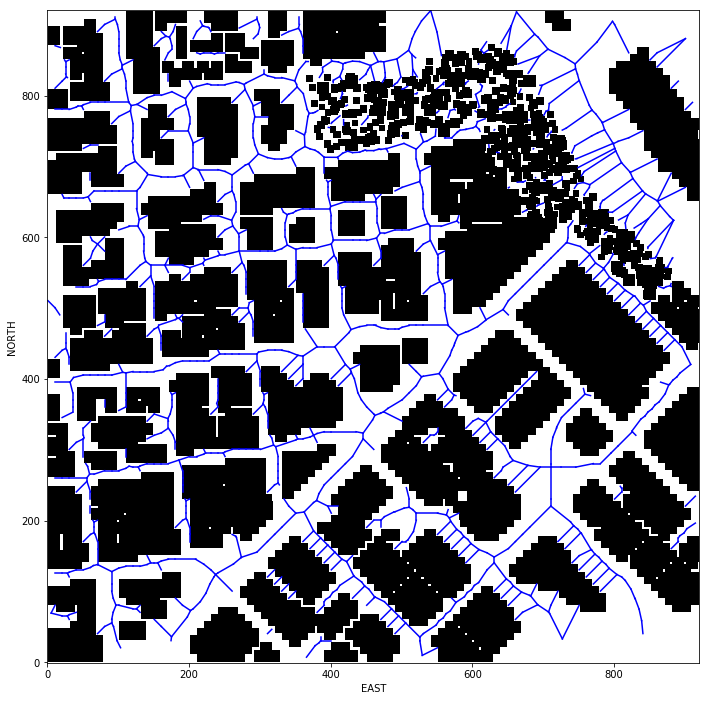

In [72]:
# equivalent to
# plt.imshow(np.flip(grid, 0))
# Plot it up!
plt.imshow(grid, origin='lower', cmap='Greys') 

# Stepping through each edge
for e in edges:
    p1 = e[0]
    p2 = e[1]
    plt.plot([p1[1], p2[1]], [p1[0], p2[0]], 'b-')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

[solution](/notebooks/Voronoi-Solution.ipynb)